In [ ]:
#import all important visualization and analyzation tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

%matplotlib inline


The superconductivity dataset was presented in Hamidieh, Kam (2018) "A data-driven statistical model for predicting the critical temperature of a superconductor." In this paper, the author builds machine learning models to predict the critical temperature of a superconductor. The most important features, as explained in the paper, are atomic radius, valence, electron affinity and atomic mass
* link1:https://www.sciencedirect.com/science/article/abs/pii/S0927025618304877
*  link2:https://link.springer.com/article/10.1007/s42452-020-03260-6

In [ ]:
## import the data set and print first five elements
df = pd.read_csv("/content/drive/MyDrive/workspace/superconductivity/train.csv")
df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


###description of data
*  Variable --Units --Description
*  Atomic Mass --Atomic mass units (AMU) --Total proton and neutron rest masses
*  First Ionization Energy --Kilo-Joules per mole (kJ/mol)-- Energy required to remove a valence electron
*  Atomic Radius --Picometer (pm) --Calculated atomic radius
*  Density --Kilograms per meters cubed (kg/m3
) --Density at standard temperature and pressure
*  Electron Affinity -- Kilo-Joules per mole (kJ/mol) --Energy required to add an electron to a neutral atom
*  Fusion Heat -- Kilo-Joules per mole (kJ/mol) --Energy to change from solid to liquid without temperature change
*  Thermal Conductivity --Watts per meter-Kelvin (W/(m K)) --Thermal conductivity coefficient κ
*  Valence No units Typical number of chemical bonds formed by the element

In [ ]:
#print the name of the columns
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [ ]:
#get an info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [ ]:
## get an statistical view of dataset
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [ ]:
#check the duplicity of data
df.duplicated().sum()

66

In [ ]:
#remove all the dublicate data as it doesnot have some serious impact on the outcome
df = df.drop_duplicates()

In [ ]:
#detect all the number of instances in the data
df.nunique()

number_of_elements           9
mean_atomic_mass          3365
wtd_mean_atomic_mass     15164
gmean_atomic_mass         3365
wtd_gmean_atomic_mass    15165
                         ...  
range_Valence                7
wtd_range_Valence         5908
std_Valence                125
wtd_std_Valence           7082
critical_temp             3007
Length: 82, dtype: int64

###Exploratory data Analysis(EDA)

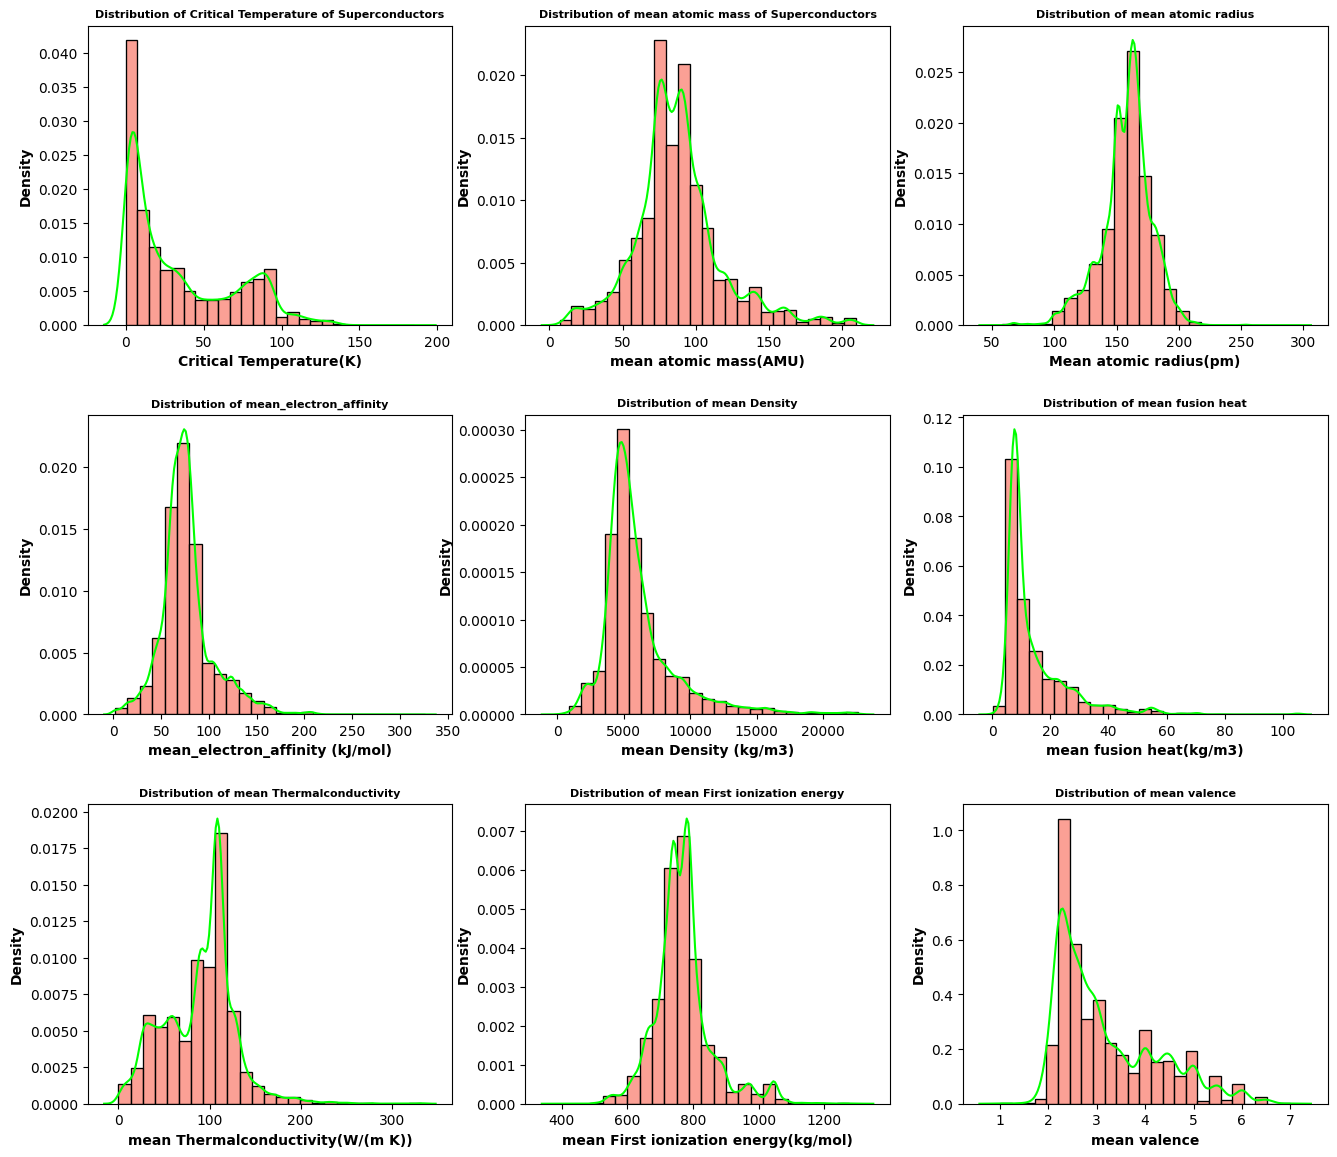

In [ ]:
fig = plt.figure(figsize=(16,14))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.2, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
#lets see how our target is varying using histogram
sns.histplot(ax= ax0 ,data= df, x = "critical_temp", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax0 ,data= df, x = "critical_temp",color="lime")
ax0.set_xlabel("Critical Temperature(K)",fontsize=10,fontweight="bold")
ax0.set_ylabel("Density",fontsize=10,fontweight="bold")
ax0.set_title("Distribution of Critical Temperature of Superconductors",fontsize=8,fontweight="bold")
#lets see how our mean atomic mass is varying using histogram

sns.histplot(ax= ax1 ,data= df, x = "mean_atomic_mass", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax1 ,data= df, x = "mean_atomic_mass",color="lime")
ax1.set_xlabel("mean atomic mass(AMU)",fontsize=10,fontweight="bold")
ax1.set_ylabel("Density",fontsize=10,fontweight="bold")
ax1.set_title("Distribution of mean atomic mass of Superconductors",fontsize=8,fontweight="bold");
#lets see how our Mean mean atomic radius is varying using histogram

sns.histplot(ax= ax2 ,data= df, x = "mean_atomic_radius", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax2 ,data= df, x = "mean_atomic_radius",color="lime")

ax2.set_xlabel("Mean atomic radius(pm)",fontsize=10,fontweight="bold")
ax2.set_ylabel("Density",fontsize=10,fontweight="bold")
ax2.set_title("Distribution of mean atomic radius",fontsize=8,fontweight="bold");
#lets see how our mean_electron_affinity is varying using histogram

sns.histplot(ax= ax3 ,data= df, x = "mean_ElectronAffinity", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax3 ,data= df, x = "mean_ElectronAffinity",color="lime")

ax3.set_xlabel("mean_electron_affinity (kJ/mol)",fontsize=10,fontweight="bold")
ax3.set_ylabel("Density",fontsize=10,fontweight="bold")
ax3.set_title("Distribution of mean_electron_affinity",fontsize=8,fontweight="bold")
#lets see how our mean Density is varying using histogram

sns.histplot(ax= ax4 ,data= df, x = "mean_Density", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax4 ,data= df, x = "mean_Density",color="lime")

ax4.set_xlabel("mean Density (kg/m3)",fontsize=10,fontweight="bold")
ax4.set_ylabel("Density",fontsize=10,fontweight="bold")
ax4.set_title("Distribution of mean Density",fontsize=8,fontweight="bold")
#lets see how our mean fusion heat is varying using histogram

sns.histplot(ax= ax5 ,data= df, x = "mean_FusionHeat", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax5 ,data= df, x = "mean_FusionHeat",color="lime")

ax5.set_xlabel("mean fusion heat(kg/m3)",fontsize=10,fontweight="bold")
ax5.set_ylabel("Density",fontsize=10,fontweight="bold")
ax5.set_title("Distribution of mean fusion heat",fontsize=8,fontweight="bold")
#lets see how our mean Thermalconductivity is varying using histogram

sns.histplot(ax= ax6 ,data= df, x = "mean_ThermalConductivity", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax6 ,data= df, x = "mean_ThermalConductivity",color="lime")

ax6.set_xlabel("mean Thermalconductivity(W/(m K))",fontsize=10,fontweight="bold")
ax6.set_ylabel("Density",fontsize=10,fontweight="bold")
ax6.set_title("Distribution of mean Thermalconductivity",fontsize=8,fontweight="bold")
#lets see how our mean First ionization energy is varying using histogram

sns.histplot(ax= ax7 ,data= df, x = "mean_fie", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax7 ,data= df, x = "mean_fie",color="lime")

ax7.set_xlabel("mean First ionization energy(kg/mol)",fontsize=10,fontweight="bold")
ax7.set_ylabel("Density",fontsize=10,fontweight="bold")
ax7.set_title("Distribution of mean First ionization energy",fontsize=8,fontweight="bold")

#lets see how our mean valence is varying using histogram

sns.histplot(ax= ax8 ,data= df, x = "mean_Valence", bins= 25, stat="density",color="salmon")
sns.kdeplot(ax= ax8 ,data= df, x = "mean_Valence",color="lime")

ax8.set_xlabel("mean valence",fontsize=10,fontweight="bold")
ax8.set_ylabel("Density",fontsize=10,fontweight="bold")
ax8.set_title("Distribution of mean valence",fontsize=8,fontweight="bold");


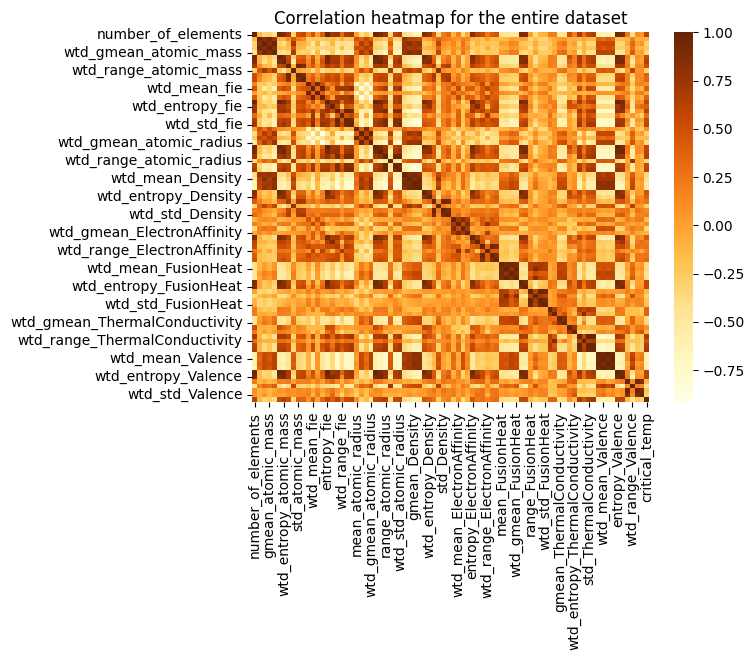

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='YlOrBr')
plt.title('Correlation heatmap for the entire dataset')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#splitting ths dataset into x and y data set
X= df.drop("critical_temp",axis = 1)
y = df.critical_temp
#splitting the dataset into training and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [ ]:
#import the machine learning models that we are going to use
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [ ]:
%%time
np.random.seed(42)
model = RandomForestRegressor(n_estimators=500,max_depth=100,min_samples_split=5)
model.fit(X_train,y_train)

CPU times: user 8min 36s, sys: 986 ms, total: 8min 37s
Wall time: 8min 55s


RandomForestRegressor(max_depth=100, min_samples_split=5, n_estimators=500)

In [ ]:
model.score(X_test,y_test)

0.9359165053076046

In [ ]:
crit_pred = model.predict(X_test)

In [ ]:
%%time
np.random.seed(42)
model2 = XGBRegressor(n_estimators=500,max_depth=100,gamma = 5,learning_rate = 0.01)
model2.fit(X_train,y_train)

CPU times: user 8min 34s, sys: 2.64 s, total: 8min 37s
Wall time: 5min


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model2.score(X_test,y_test)

0.9275864302890846

In [ ]:
crit_pred2 = model2.predict(X_test)

In [ ]:
%%time
np.random.seed(42)
model3 = LGBMRegressor(n_estimators = 1000,force_col_wise=True)
model3.fit(X_train,y_train)

[LightGBM] [Info] Total Bins 19501
[LightGBM] [Info] Number of data points in the train set: 16957, number of used features: 81
[LightGBM] [Info] Start training from score 34.464583
CPU times: user 12.2 s, sys: 64.7 ms, total: 12.2 s
Wall time: 12.4 s


LGBMRegressor(force_col_wise=True, n_estimators=1000)

In [ ]:
model3.score(X_test,y_test)

0.936893602110059

In [ ]:
%%time
np.random.seed(42)
model4 = CatBoostRegressor(learning_rate=0.03,n_estimators=500,depth = 10)
model4.fit(X_train,y_train)

0:	learn: 33.3982384	total: 623ms	remaining: 5m 10s
1:	learn: 32.6399792	total: 1.27s	remaining: 5m 16s
2:	learn: 31.9516596	total: 1.87s	remaining: 5m 10s
3:	learn: 31.2728472	total: 2.56s	remaining: 5m 16s
4:	learn: 30.5949923	total: 3.22s	remaining: 5m 18s
5:	learn: 29.9391825	total: 3.72s	remaining: 5m 6s
6:	learn: 29.3156901	total: 4.11s	remaining: 4m 49s
7:	learn: 28.7009809	total: 4.53s	remaining: 4m 38s
8:	learn: 28.1135955	total: 4.77s	remaining: 4m 20s
9:	learn: 27.5349107	total: 4.99s	remaining: 4m 4s
10:	learn: 26.9852680	total: 5.22s	remaining: 3m 52s
11:	learn: 26.4739004	total: 5.44s	remaining: 3m 41s
12:	learn: 25.9520014	total: 5.68s	remaining: 3m 32s
13:	learn: 25.4575099	total: 5.91s	remaining: 3m 25s
14:	learn: 24.9887197	total: 6.13s	remaining: 3m 18s
15:	learn: 24.5272208	total: 6.35s	remaining: 3m 11s
16:	learn: 24.0724768	total: 6.57s	remaining: 3m 6s
17:	learn: 23.6575377	total: 6.8s	remaining: 3m 2s
18:	learn: 23.2387384	total: 7.03s	remaining: 2m 57s
19:	lear

In [ ]:
crit_pred3= model3.predict(X_test)

## evaluation metrics


In [ ]:
crit_pred4= model4.predict(X_test)
r24=r2_score(y_test,crit_pred4)
r21=r2_score(y_test,crit_pred)
r22=r2_score(y_test,crit_pred2)
r23=r2_score(y_test,crit_pred3)

In [ ]:
mae1= mean_absolute_error(y_test,crit_pred)
mae2= mean_absolute_error(y_test,crit_pred2)
mae3= mean_absolute_error(y_test,crit_pred3)
mae4= mean_absolute_error(y_test,crit_pred4)

In [ ]:
rmse1 = np.sqrt(mean_squared_error(y_test,crit_pred))
rmse2 = np.sqrt(mean_squared_error(y_test,crit_pred2))
rmse3 = np.sqrt(mean_squared_error(y_test,crit_pred3))
rmse4 = np.sqrt(mean_squared_error(y_test,crit_pred4))

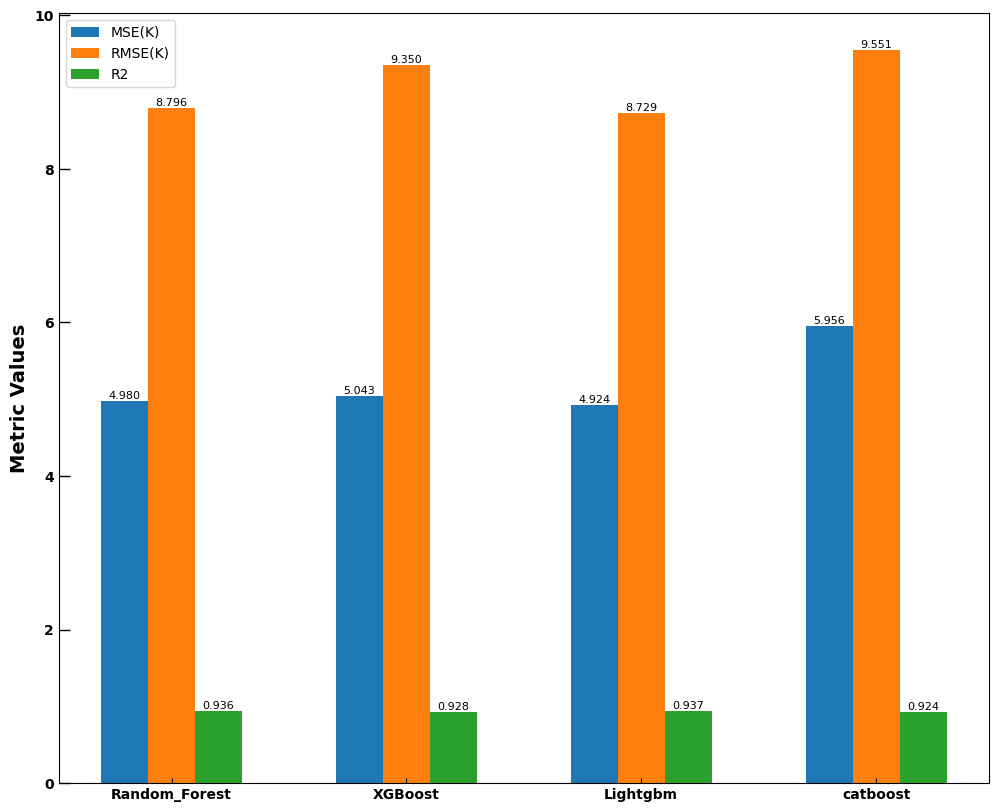

In [ ]:
# Data
models = ['Random_Forest','XGBoost','Lightgbm','catboost']
mse_values = [mae1,mae2,mae3,mae4]
rmse_values = [rmse1,rmse2,rmse3,rmse4]
r2_values = [r21,r22,r23,r24]

# Bar width
bar_width = 0.2

# Set up the bar positions
bar_positions_mse = np.arange(len(models))
bar_positions_rmse = bar_positions_mse + bar_width
bar_positions_r2 = bar_positions_rmse + bar_width

# Create the bar plot
plt.figure(figsize =(12,10))
plt.bar(bar_positions_mse, mse_values, width=bar_width, label='MSE(K)')
plt.bar(bar_positions_rmse, rmse_values, width=bar_width, label='RMSE(K)')
plt.bar(bar_positions_r2, r2_values, width=bar_width, label='R2')
# Add values on top of the bars with formatting to two decimal places
for i, value in enumerate(mse_values):
    plt.text(bar_positions_mse[i], value + 0.005, f'{value:.3f}', ha='center', va='bottom',fontsize=8)

for i, value in enumerate(rmse_values):
    plt.text(bar_positions_rmse[i], value + 0.005, f'{value:.3f}', ha='center', va='bottom',fontsize=8)

for i, value in enumerate(r2_values):
    plt.text(bar_positions_r2[i], value + 0.005, f'{value:.3f}', ha='center', va='bottom',fontsize=8)
# Set labels and title

plt.ylabel('Metric Values',fontsize=14,fontweight = "bold")
plt.xticks(bar_positions_rmse, models)
plt.xticks(color = 'k', fontsize=10,fontweight = "bold")
plt.yticks(color = 'k', fontsize=10,fontweight = "bold")
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.legend()
plt.savefig("comp.png",dpi =600)
# Show the plot
plt.show()

In [ ]:
crit_pred = pd.DataFrame(crit_pred)
crit_pred2 = pd.DataFrame(crit_pred2)
crit_pred3= pd.DataFrame(crit_pred3)
crit_pred4 = pd.DataFrame(crit_pred4)


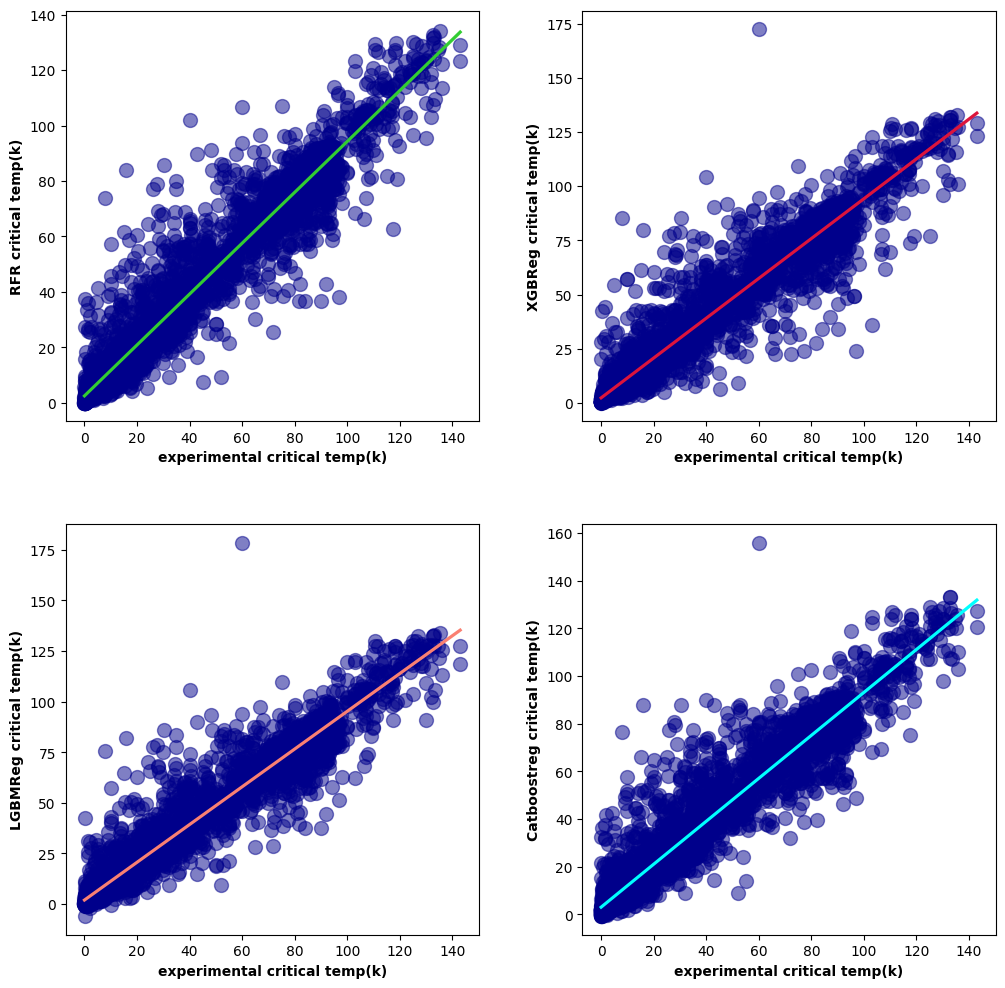

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
#RFR
sns.regplot(ax = ax0,x = y_test,y = crit_pred,ci=95 ,
            scatter_kws = {"s" :100, "alpha" : 0.5,'color' :'darkblue'}, line_kws=dict(color="limegreen"))
ax0.set_xlabel("experimental critical temp(k)",fontsize=10,fontweight="bold")
ax0.set_ylabel("RFR critical temp(k)",fontsize=10,fontweight="bold")
#XGBOOST
sns.regplot(ax = ax1,x = y_test,y = crit_pred2,ci=95 ,
            scatter_kws = {"s" :100, "alpha" : 0.5,'color' :'darkblue'}, line_kws=dict(color="crimson"))
ax1.set_xlabel("experimental critical temp(k)",fontsize=10,fontweight="bold")
ax1.set_ylabel("XGBReg critical temp(k)",fontsize=10,fontweight="bold")
#lightbgm
sns.regplot(ax = ax2,x = y_test,y = crit_pred3,ci=95 ,
            scatter_kws = {"s" :100, "alpha" : 0.5,'color' :'darkblue'}, line_kws=dict(color="salmon"))
ax2.set_xlabel("experimental critical temp(k)",fontsize=10,fontweight="bold")
ax2.set_ylabel("LGBMReg critical temp(k)",fontsize=10,fontweight="bold")
#catboost
sns.regplot(ax = ax3,x = y_test,y = crit_pred4,ci=95 ,
            scatter_kws = {"s" :100, "alpha" : 0.5,'color' :'darkblue'}, line_kws=dict(color="cyan"))
ax3.set_xlabel("experimental critical temp(k)",fontsize=10,fontweight="bold")
ax3.set_ylabel("Catboostreg critical temp(k)",fontsize=10,fontweight="bold");
plt.savefig("crit_reg.png",dpi =600)

from our result it is seen tnat lightgbm performs best among all the regression algorithm further nural network can be utilized to analyze data.